<a href="https://colab.research.google.com/github/raina140291/disney/blob/master/SurveyDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/raina140291/disney.git

Cloning into 'disney'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 6), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [2]:
!ls disney/

README.md  SurveyDataExploration.ipynb	ThemePark.csv


In [ ]:
#!pip install plotly --upgrade

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
#import seaborn as sns
#color = sns.color_palette()
%matplotlib inline

In [4]:
#Read CSV into dataframe
df = pd.read_csv('disney/ThemePark.csv', index_col = 0, sep=",")

In [ ]:
df.dtypes

In [5]:
df.columns

Index(['Visit_Year', 'Num_Adults', 'Num_Kids', 'Ticket_Source', 'Ticket_Type',
       'Stay_Length', 'Transport', 'Digital_Assets', 'Revisit_Concern',
       'Top_Two', 'Giftshop_Concern', 'F&B_Concern', 'Hotel_Concern',
       'Themed_Concern', 'OSS_ROE', 'Cast_Concern', 'Singlepath_Concern',
       'Rides_Concern', 'Tempcheck_Concern', 'Digitalline_Concern', 'EE_ROE',
       'Potluck_ROE', 'Parade_ROE', 'Newhotel_ROE', 'Gender', 'Age',
       'Country'],
      dtype='object')

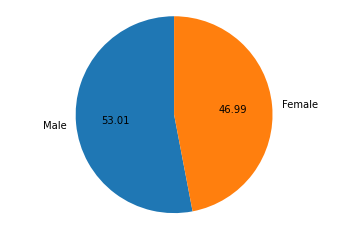

In [5]:
#Desriptive Analytics - GENDER
temp_series = df['Gender'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

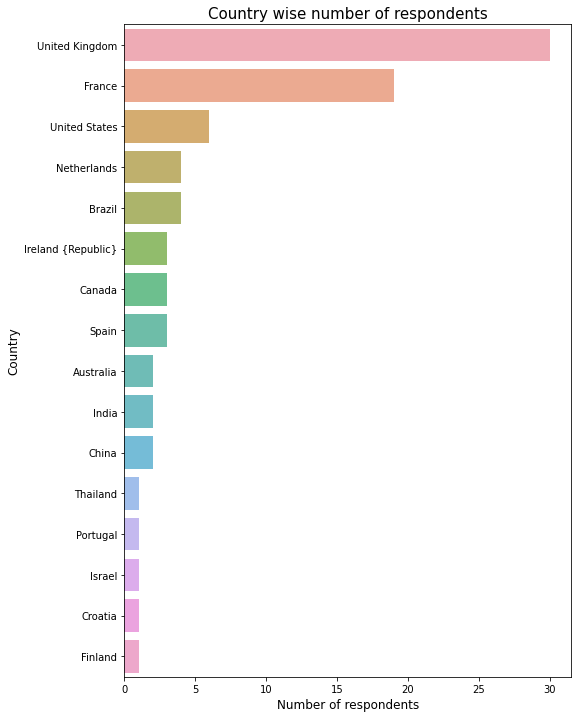

In [31]:
#Desriptive Analytics - COUNTRY
cnt_srs = df['Country'].value_counts().head(25)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of respondents', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title("Country wise number of respondents", fontsize=15)
plt.show()

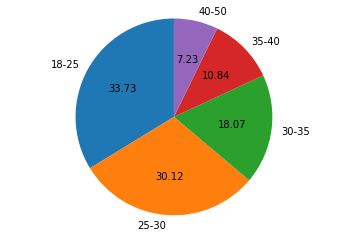

In [36]:
#Desriptive Analytics - AGE
cnt_srs = df['Age'].value_counts()
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

figureObject, axesObject = plotter.subplots()
axesObject.pie(sizes,
        labels=labels,
        autopct='%1.2f',
        startangle=90)
axesObject.axis('equal')
plotter.show()

In [10]:
X = df[['Revisit_Concern', 'Giftshop_Concern', 'F&B_Concern', 'Hotel_Concern', 
                             'Themed_Concern', 'OSS_ROE', 'Cast_Concern', 'Singlepath_Concern', 
                             'Rides_Concern', 'Tempcheck_Concern', 'Digitalline_Concern']]
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_.cumsum()[1]

0.5954834693602283

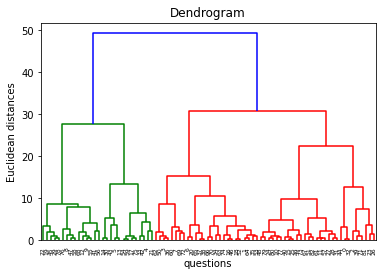

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram = dendrogram(linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('questions')
plt.ylabel('Euclidean distances')
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 2, 
                          affinity ='euclidean', 
                          linkage ='ward')
y = model.fit_predict(X_pca)

In [42]:
len(y)

83

In [44]:
df['Cluster'] = y

In [51]:
df_cluster1 = df[df['Cluster']==0]
df_cluster2 = df[df['Cluster']==1]

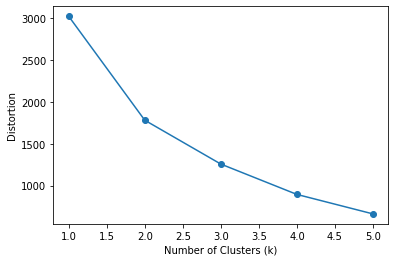

In [11]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

In [34]:
model = KMeans(
    n_clusters=2,
    init='k-means++',
    n_jobs=-1,
    random_state=1)

model = model.fit(X_pca)

y_kmeans = model.predict(X_pca)

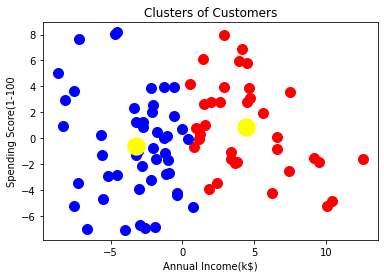

In [35]:
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X_pca[y_kmeans==4, 0], X_pca[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()